<a href="https://colab.research.google.com/github/secutron/RunTime/blob/master/VOCAani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install Python==3.6.8
!pip install tensorflow==1.14.0


     |████████████████████████████████| 109.2MB 37kB/s 
     |████████████████████████████████| 3.2MB 52.3MB/s 
     |████████████████████████████████| 491kB 52.5MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [2]:
!pip install pyrender

     |████████████████████████████████| 1.2MB 2.7MB/s 
     |████████████████████████████████| 624kB 12.2MB/s 
     |████████████████████████████████| 890kB 14.0MB/s 
     |████████████████████████████████| 1.2MB 23.0MB/s 
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-cp36-none-any.whl size=1745212 sha256=1e8e671bda68de8a7a6d072502efd7cf8a06d3c7f7387e58562052f6bca0d87d
  Stored in directory: /root/.cache/pip/wheels/6c/00/7f/1dd736f380848720ad79a1a1de5272e0d3f79c15a42968fb58
Successfully built PyOpenGL
  Found existing installation: PyOpenGL 3.1.5
    Uninstalling PyOpenGL-3.1.5:
      Successfully uninstalled PyOpenGL-3.1.5


In [3]:
# Clone pyrender to get some sample models
!git clone https://github.com/mmatl/pyrender.git

Cloning into 'pyrender'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1122 (delta 10), reused 21 (delta 9), pack-reused 1094
Receiving objects: 100% (1122/1122), 28.38 MiB | 41.69 MiB/s, done.
Resolving deltas: 100% (661/661), done.


In [4]:
!pwd

/content


In [6]:
# Render offscreen -- make sure to set the PyOpenGL platform
import os
os.environ["PYOPENGL_PLATFORM"] = "egl" #osmesa" #egl"
import numpy as np
import trimesh
import pyrender

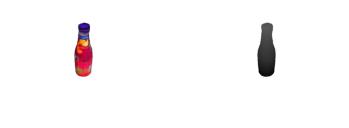

In [7]:
# Load the FUZE bottle trimesh and put it in a scene
fuze_trimesh = trimesh.load('pyrender/examples/models/fuze.obj')
mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
s = np.sqrt(2)/2
camera_pose = np.array([
       [0.0, -s,   s,   0.3],
       [1.0,  0.0, 0.0, 0.0],
       [0.0,  s,   s,   0.35],
       [0.0,  0.0, 0.0, 1.0],
    ])
scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
color, depth = r.render(scene)

# Show the images
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()

In [8]:
!git clone https://github.com/tegusi/animation-generation VOCAani

Cloning into 'VOCAani'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 87 (delta 1), reused 6 (delta 1), pack-reused 81
Unpacking objects: 100% (87/87), done.


In [ ]:
from IPython.display import clear_output, Image, display, HTML
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from utils.audio_handler import AudioHandler
from psbody.mesh import Mesh
from utils.rendering import render_mesh_helper

In [7]:
%cd /content/VOCAani

/content/VOCAani


In [8]:
!pip install -r requirements.txt

     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 377.0MB 44kB/s 
  Created wheel for chumpy: filename=chumpy-0.69-cp36-none-any.whl size=58290 sha256=90ee1da9bc2717ed0b7fa7151675ce9a9b0710476e3de2cad202771880ddeec6
  Stored in directory: /root/.cache/pip/wheels/df/11/36/2758327d759bad62803f3f9190db1c063e52a0358cecd33e94
  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=ddecc7add9a7371897a21f5ce0eef9dfc9d7943d2d37fa9a9c86b84097bfe054
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built chumpy python-speech-features


In [5]:
!git clone https://github.com/MPI-IS/mesh.git MESH
%cd MESH
!make all

Cloning into 'MESH'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 307 (delta 47), reused 57 (delta 30), pack-reused 215
Receiving objects: 100% (307/307), 19.72 MiB | 14.67 MiB/s, done.
Resolving deltas: 100% (140/140), done.
/content/VOCAani/MESH
----- [ mesh_package ] Installing with the interpreter /usr/local/bin/python (version 3.6.9)
     |████████████████████████████████| 798kB 9.9MB/s 
     |████████████████████████████████| 14.5MB 239kB/s 
     |████████████████████████████████| 11.5MB 264kB/s 
     |████████████████████████████████| 25.9MB 100kB/s 
Requirement already up-to-date: pyopengl in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (3.1.5)
     |████████████████████████████████| 2.2MB 49.4MB/s 
Requirement already up-to-date: pyzmq in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (19.0.1)
     |█████████████████

In [6]:
%cd ..
!meshviewer view "MESH/data/unittest/sphere.obj"

/content/VOCAani
INFO:root:started remote viewer on port 64660


In [3]:
!sudo apt update
!sudo apt install ffmpeg

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [43.3 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:12 https://developer.download.nvidia.com/compute/machine-learning/r

In [11]:
#!sudo apt-get install llvm-6.0 freeglut3 freeglut3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
freeglut3 is already the newest version (2.8.1-3).
freeglut3 set to manually installed.
freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  binfmt-support libffi-dev llvm-6.0-dev llvm-6.0-runtime
Suggested packages:
  llvm-6.0-doc
The following NEW packages will be installed:
  binfmt-support libffi-dev llvm-6.0 llvm-6.0-dev llvm-6.0-runtime
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 28.2 MB of archives.
After this operation, 178 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 binfmt-support amd64 2.1.8-2 [51.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 llv

In [20]:
#!pip install pyrender

In [7]:
!sudo wget https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
!sudo dpkg -i ./mesa_18.3.3-0.deb || true
!sudo apt install -f
!git clone https://github.com/mmatl/pyopengl.git
!pip install ./pyopengl

--2020-07-29 04:10:56--  https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mmatl/travis_debs/master/xenial/mesa_18.3.3-0.deb [following]
--2020-07-29 04:10:57--  https://raw.githubusercontent.com/mmatl/travis_debs/master/xenial/mesa_18.3.3-0.deb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31776942 (30M) [application/octet-stream]
Saving to: ‘mesa_18.3.3-0.deb’

mesa_18.3.3-0.deb   100%[===================>]  30.30M  39.9MB/s    in 0.8s    

2020-07-29 04:10:58 (39.9 MB/s) - ‘mesa_18.3.3-0.deb’ saved [31776942/31776942]

(Readi

In [15]:
!git clone https://github.com/mmatl/pyrender.git

Cloning into 'pyrender'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1122 (delta 10), reused 21 (delta 9), pack-reused 1094
Receiving objects: 100% (1122/1122), 28.38 MiB | 33.25 MiB/s, done.
Resolving deltas: 100% (661/661), done.


In [4]:
!pwd
%cd /content

/root
/content


In [5]:
import os
os.environ["PYOPENGL_PLATFORM"] = "osmesa"
import numpy as np
import trimesh
import pyrender


AttributeError: ignored

In [6]:

# Load the FUZE bottle trimesh and put it in a scene
fuze_trimesh = trimesh.load('pyrender/examples/models/fuze.obj')
mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
s = np.sqrt(2)/2
camera_pose = np.array([
       [0.0, -s,   s,   0.3],
       [1.0,  0.0, 0.0, 0.0],
       [0.0,  s,   s,   0.35],
       [0.0,  0.0, 0.0, 1.0],
    ])
scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
color, depth = r.render(scene)

# Show the images
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()

ValueError: ignored

In [ ]:
%cd /content
!git clone https://github.com/TimoBolkart/voca.git VOCA
%cd /content/VOCA

/content
Cloning into 'VOCA'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 174 (delta 6), reused 5 (delta 2), pack-reused 157
Receiving objects: 100% (174/174), 14.56 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/VOCA


In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=8943cd44f0eb87a29ba70347a443f04bc45c2f17e94a01a838fbe959fd713def
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/mmatl/pyrender.git

Cloning into 'pyrender'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1122 (delta 10), reused 21 (delta 9), pack-reused 1094
Receiving objects: 100% (1122/1122), 28.38 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (661/661), done.


In [ ]:
!python run_voca.py --visualize False --tf_model_fname './model/gstep_52280.model' --ds_fname './ds_graph/output_graph.pb' --audio_fname '../b2-scale512.wav' --template_fname './template/FLAME_sample.ply' --condition_idx 3 --out_path './animation_output'

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!pwd

/content


In [ ]:
# Install dependencies - OSMesa, mmatl's fork of PyOpenGL
!sudo apt update
!sudo wget https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
!sudo dpkg -i ./mesa_18.3.3-0.deb || true
!sudo apt install -f
!git clone https://github.com/mmatl/pyopengl.git
!pip install ./pyopengl

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
114 packages can be upgraded. Run 'ap

In [ ]:
import os
os.environ["PYOPENGL_PLATFORM"] = "osmesa"
import numpy as np
import trimesh
import pyrender

In [ ]:
!pwd

/content


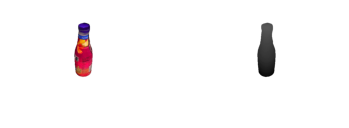

In [ ]:
# Load the FUZE bottle trimesh and put it in a scene
fuze_trimesh = trimesh.load('VOCA/pyrender/examples/models/fuze.obj')
mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
s = np.sqrt(2)/2
camera_pose = np.array([
       [0.0, -s,   s,   0.3],
       [1.0,  0.0, 0.0, 0.0],
       [0.0,  s,   s,   0.35],
       [0.0,  0.0, 0.0, 1.0],
    ])
scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
color, depth = r.render(scene)

# Show the images
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
plt.axis('off')

plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()

In [ ]:
def render_sequence_meshes(audio_fname, sequence_vertices, template, out_path):
    """
    This function is used for rendering meshes(obj files) into images.
    The original function is defined in util.inference, but this is some issue while running it directly with osmesa.
    Input:
        audio_fname (string): audio file name
        sequence_vertices(list): a list of obj vetexs
        template: 
        out_path: location of generation video
    
    
    """
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    tmp_filename = out_path + '/tmp_video.mp4'
        
    if int(cv2.__version__[0]) < 3:
        writer = cv2.VideoWriter(tmp_filename, cv2.cv.CV_FOURCC(*'mp4v'), 60, (800, 800), True)
    else:
        writer = cv2.VideoWriter(tmp_filename, cv2.VideoWriter_fourcc(*'mp4v'), 60, (800, 800), True)

    num_frames = sequence_vertices.shape[0]
    center = np.mean(sequence_vertices[0], axis=0)
    for i_frame in tqdm(range(num_frames)):
        img = render_mesh_helper(Mesh(sequence_vertices[i_frame], template.f), center)
        writer.write(img)
    writer.release()

    video_fname = os.path.join(out_path, 'video.mp4')

    cmd = ('ffmpeg' + ' -i {0} -i {1} -vcodec h264 -ac 2 -channel_layout stereo -pix_fmt yuv420p {2}'.format(
        audio_fname, tmp_filename, video_fname)).split()
    print(cmd)
    subprocess.call(cmd)
    
    print("Generation Done...")

In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Sequence visualization')
parser.add_argument('--sequence_path', default='./VOCA/animation_output', help='Path to motion sequence')
parser.add_argument('--audio_fname', default='', help='Path of speech sequence')
parser.add_argument('--out_path', default='./VOCA/animation_visualization', help='Output path')

args = parser.parse_args(args=[])

# add new path

# Eng sample 
args.sequence_path = './VOCA/animation_output/meshes/'
args.audio_fname = './b2-scale512.wav'

# Korean Sample
# args.sequence_path = './animation_output/Korean/meshes/'
# args.audio_frame = './audio/story_korean_30.wav'

# Korean Sample
# args.sequence_path = './animation_output/Koo/meshes/'
# args.audio_fname = './audio/koo.wav'
# args.out_path = './animation_visualization/koo/'


# Add Eye-blink
#args.sequence_path = './FLAME_eye_blink/meshes/'
#args.audio_fname = './audio/test_sentence.wav'

# Acheive useful directories
sequence_path = args.sequence_path
audio_fname = args.audio_fname
out_path = args.out_path

print(args)

Namespace(audio_fname='./b2-scale512.wav', out_path='./VOCA/animation_visualization', sequence_path='./VOCA/animation_output/meshes/')


In [ ]:
import glob
import time
from tqdm import tqdm
from tqdm import trange

import trimesh
from psbody.mesh import Mesh

# Load vertexex into a list from obj files
sequence_fnames = sorted(glob.glob(os.path.join(sequence_path, '*.obj')))
if len(sequence_fnames) == 0:
    print('No meshes found')

sequence_vertices = []

f = None
for frame_idx, mesh_fname in tqdm(enumerate(sequence_fnames)):
    frame = Mesh(filename=mesh_fname)
    sequence_vertices.append(frame.v)
    if f is None:
        f = frame.f

template = Mesh(sequence_vertices[0], f)
sequence_vertices = np.stack(sequence_vertices)
print(sequence_vertices.shape)

1338it [00:35, 37.92it/s]

(1338, 5023, 3)


In [ ]:
import cv2
import subprocess
from subprocess import call
from VOCA.utils.rendering import get_unit_factor, render_mesh_helper

render_sequence_meshes(audio_fname, sequence_vertices, template, out_path)

100%|██████████| 1338/1338 [08:52<00:00,  2.51it/s]

['ffmpeg', '-i', './b2-scale512.wav', '-i', './VOCA/animation_visualization/tmp_video.mp4', '-vcodec', 'h264', '-ac', '2', '-channel_layout', 'stereo', '-pix_fmt', 'yuv420p', './VOCA/animation_visualization/video.mp4']
Generation Done...
